## Analysing the Dataset 

In [1]:
# Importing required libraries to analyse the Dataset "New_data_Set"

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
df=pd.read_csv(r"C:\Users\user\Downloads\New_data_Set.csv")

"New_data_Set" is about brief understanding of the HR industry that is responsible for finding, screening, recruiting, and training job applicants, and administering employee-benefit programs. It has features like Gender, Salary, Base_pay, Age, Bonus etc.

In [6]:
df.head()

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.35,66130600,4.26,4.31,3.83,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.34,26868200,4.79,4.41,4.08,18.80,19.05,1,High School or less


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        4977 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  3524 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     4992 non-null   o

In [2]:
# Let us find out if there any Nan values in our data 
df.isna().sum()

Gender               0
Business             0
Dependancies         0
Calls                0
Type                 0
Billing              0
Rating               0
Age                  0
Salary               0
Base_pay            23
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1476
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales          8
Months               0
Education            0
dtype: int64

In [8]:
df.shape

(5000, 20)

## Data Preprocessing

In [2]:
# we shud observe that Total_Sales column is of object type. So we can't plot boxplot. 
# So we need to convert to numeric type but there are 8 Blanks in Total_Sales which are considered as strings.
# So first we shud replace the Blanks with 'Nan's
df['Total_Sales']=df['Total_Sales'].replace(" ",np.nan)

In [3]:
# Converting 'Total_Sales' to numeric from Object type
df['Total_Sales'] = pd.to_numeric(df['Total_Sales'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        4977 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  3524 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     4984 non-null   f

In [4]:
# Rounding off the below columns for better understanding

df['Salary']=df['Salary'].round(2)
df['Base_pay']=df['Base_pay'].round(2)
df['Bonus']=df['Bonus'].round(2)
df['Unit_Price']=df['Unit_Price'].round(2)
df['openingbalance']=df['openingbalance'].round(2)
df['closingbalance']=df['closingbalance'].round(2)
df['low']=df['low'].round(2)
df['Unit_Sales']=df['Unit_Sales'].round(2)
df['Total_Sales']=df['Total_Sales'].round(2)

In [5]:
# We can't remove the rows the Nan values since the ratio is quite high (1476+23+8/5000)*100=30.14 %
# So we can replace the Null values in our data set with median as below
df['Total_Sales']=df['Total_Sales'].replace(np.nan,df['Total_Sales'].median())
df['openingbalance']=df['openingbalance'].replace(np.nan,df['openingbalance'].median())
df['Base_pay']=df['Base_pay'].replace(np.nan,df['Base_pay'].median())

In [14]:
((1476+23+8)/5000)*100


30.14

In [13]:
# Let's check for Null values, if any
df.isna().sum()

Gender            0
Business          0
Dependancies      0
Calls             0
Type              0
Billing           0
Rating            0
Age               0
Salary            0
Base_pay          0
Bonus             0
Unit_Price        0
Volume            0
openingbalance    0
closingbalance    0
low               0
Unit_Sales        0
Total_Sales       0
Months            0
Education         0
dtype: int64

## Handling Outliers

<AxesSubplot:>

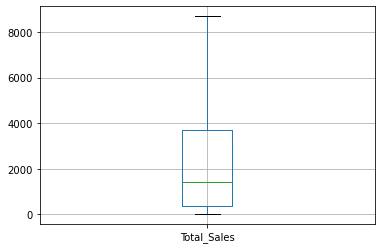

In [17]:

df.boxplot('Total_Sales')

<AxesSubplot:>

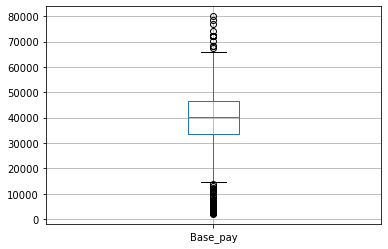

In [18]:
df.boxplot('Base_pay')

<AxesSubplot:>

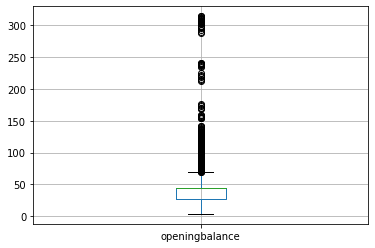

In [19]:
df.boxplot('openingbalance')

We have outliers in Base_pay and openingbalance. So let's handle outliers using IQR( Inter Quartile Range)

We should not be removing outliers from opening balance bcoz there are many(485) outliers which is almost 10 %  


In [6]:
# Treating outliers for Base_pay using IQR method:

q1 = df.Base_pay.quantile(0.25)
q3 = df.Base_pay.quantile(0.75)
print("q1: ",q1)
print("q3: ",q3)

IQR = q3-q1
print("IQR: ",IQR)
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
print("lower bound: ",lwr_bound)

print("upper bound: ",upr_bound)


q1:  33744.0225
q3:  46764.8375
IQR:  13020.815000000002
lower bound:  14212.799999999996
upper bound:  66296.06


In [7]:
df = df[(df.Base_pay>lwr_bound) & (df.Base_pay<upr_bound)]
df.shape

(4917, 20)

## Data Visualization

In [14]:
%matplotlib inline

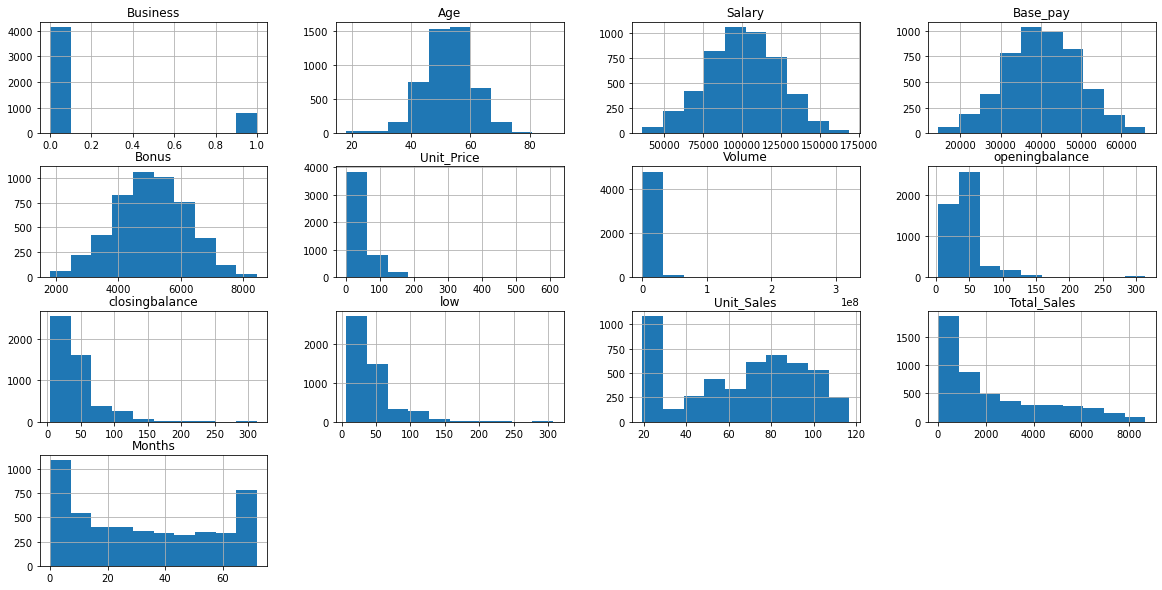

In [46]:
# Using hist plot to find the distribution of the given variables. 

df.hist(figsize=(20,10))
plt.show()

From above graph, we can see that 'Age', 'Salary', 'Base_pay', 'Bonus' follow Normal Distribution

In [16]:
# Finding Spearman correlation coefficients to find how varaibles are related to each other

df.corr(method='spearman')

,Business,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months
Business,1.000000,-0.014411,-0.024952,-0.025866,-0.024951,-0.024820,0.001360,0.000733,-0.013332,-0.024640,-0.024910,-0.025321,-0.018055
Age,-0.014411,1.000000,0.163726,0.153483,0.163726,0.093124,-0.015126,0.045893,0.416541,0.163473,0.163712,0.162124,0.187462
Salary,-0.024952,0.163726,1.000000,0.993422,1.000000,0.805981,-0.378747,0.139850,0.314662,0.999851,0.999997,0.998555,0.585079
Base_pay,-0.025866,0.153483,0.993422,1.000000,0.993422,0.802300,-0.378235,0.130452,0.307393,0.993267,0.993418,0.991979,0.578113
Bonus,-0.024951,0.163726,1.000000,0.993422,1.000000,0.805981,-0.378747,0.139850,0.314662,0.999851,0.999997,0.998555,0.585079
Unit_Price,-0.024820,0.093124,0.805981,0.802300,0.805981,1.000000,-0.309252,0.068384,0.234044,0.806708,0.806007,0.805186,0.534800
Volume,0.001360,-0.015126,-0.378747,-0.378235,-0.378747,-0.309252,1.000000,0.015687,-0.127087,-0.380525,-0.378767,-0.377733,-0.246730
openingbalance,0.000733,0.045893,0.139850,0.130452,0.139850,0.068384,0.015687,1.000000,0.227819,0.139796,0.139843,0.138919,-0.093258
closingbalance,-0.013332,0.416541,0.314662,0.307393,0.314662,0.234044,-0.127087,0.227819,1.000000,0.314431,0.314648,0.313720,0.337547
low,-0.024640,0.163473,0.999851,0.993267,0.999851,0.806708,-0.380525,0.139796,0.314431,1.000000,0.999849,0.998393,0.585034


We can observe that Salary is in:
High correlation with Base_pay,Bonus, Unit_Price,low,Unit_Sales,Total_Sales, Months
Moderate correlation with Age, openingbalance,closingbalance
Negative correlation with Business, Volume 

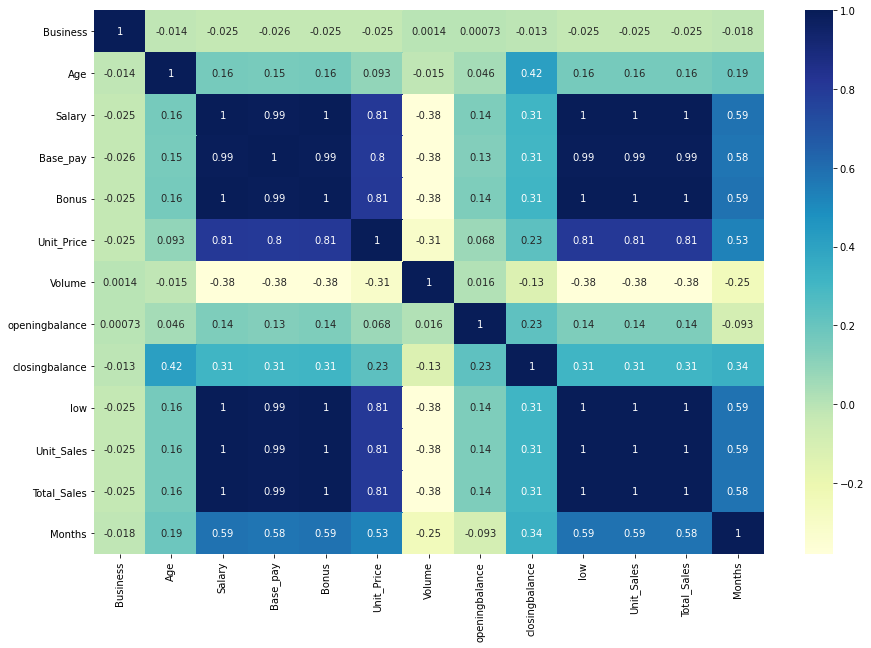

In [17]:
# Trying to visualise correlation using Heatmap

plt.figure(figsize = (15,10))

hmp=sns.heatmap(df.corr(method='spearman'),annot=True,cmap="YlGnBu")


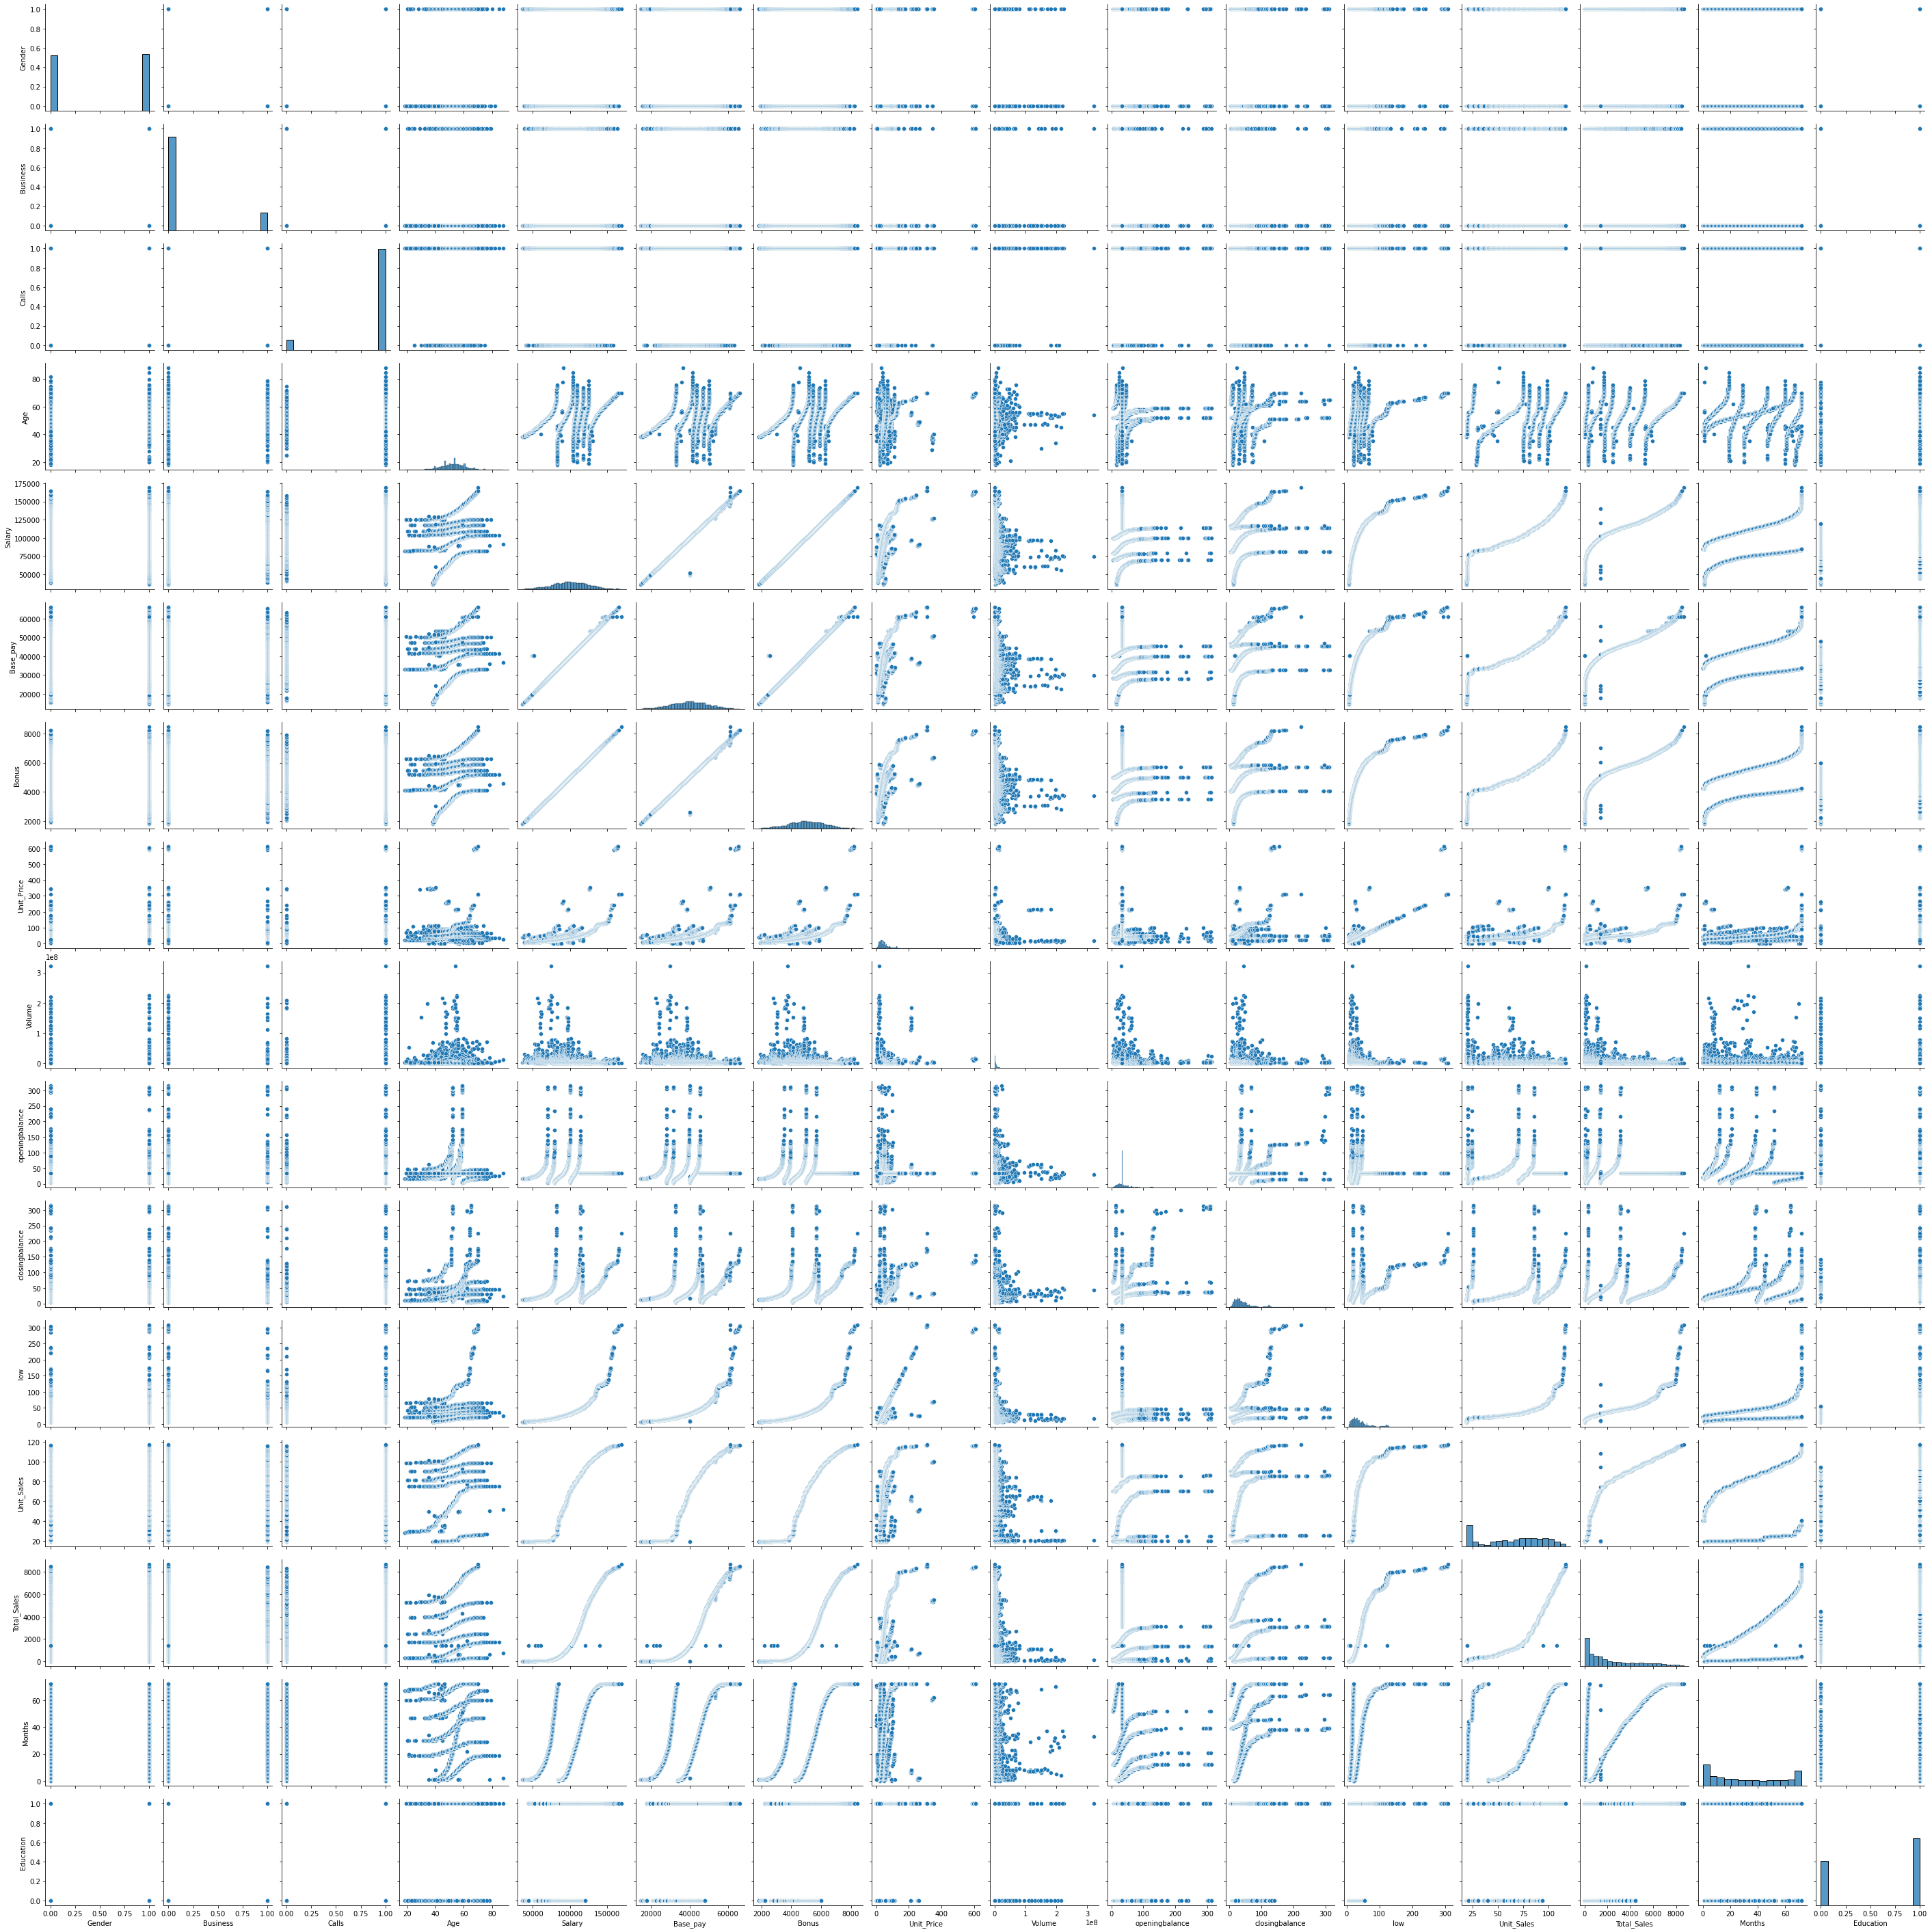

In [27]:
sns.pairplot(data=df)

## Converting Categorical Columns to Numerical

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4917 entries, 67 to 4990
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          4917 non-null   object 
 1   Business        4917 non-null   int64  
 2   Dependancies    4917 non-null   object 
 3   Calls           4917 non-null   object 
 4   Type            4917 non-null   object 
 5   Billing         4917 non-null   object 
 6   Rating          4917 non-null   object 
 7   Age             4917 non-null   int64  
 8   Salary          4917 non-null   float64
 9   Base_pay        4917 non-null   float64
 10  Bonus           4917 non-null   float64
 11  Unit_Price      4917 non-null   float64
 12  Volume          4917 non-null   int64  
 13  openingbalance  4917 non-null   float64
 14  closingbalance  4917 non-null   float64
 15  low             4917 non-null   float64
 16  Unit_Sales      4917 non-null   float64
 17  Total_Sales     4917 non-null   

In [ ]:
# From the above info, catgorical columns are Gender, Dependencies, Calls, Type, Billing, Rating and  Education

In [43]:
# Trying to find the unique values in each catgorical column

print(df['Gender'].unique())

print(df['Dependancies'].unique())

print(df['Calls'].unique())

print(df['Type'].unique())

print(df['Billing'].unique())

print(df['Rating'].unique())

print(df['Education'].unique())

['Female' 'Male']
['No' 'Yes']
['Yes' 'No']
['Month-to-month' 'Two year' 'One year']
['No' 'Yes']
['Yes' 'No']
['High School or less' 'Intermediate' 'Graduation' 'PG']


In [8]:
# Using LabelEncoder to convert Categorical Columns to Numerical

from sklearn.preprocessing import LabelEncoder

Gender_encoder = LabelEncoder()

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()


df['Gender']= label_encoder.fit_transform(df['Gender'])

df['Dependancies']= label_encoder.fit_transform(df['Dependancies'])

df['Calls']= label_encoder.fit_transform(df['Calls'])

df['Billing']= label_encoder.fit_transform(df['Billing'])

df['Rating']= label_encoder.fit_transform(df['Rating'])

df['Type']= label_encoder.fit_transform(df['Type'])

df['Education']= label_encoder.fit_transform(df['Education'])



In [23]:
df.head(10)

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
67,1,0,1,1,0,1,0,38,36258.40,14503.36,1812.92,40.52,2890800,16.09,12.43,6.67,19.3,20.10,1,0
68,1,0,0,1,1,0,0,38,36966.16,14786.47,1848.31,40.97,3721800,16.15,12.45,6.70,19.3,20.15,1,0
69,0,0,0,1,0,0,1,38,38048.29,15219.32,1902.41,40.94,3732600,16.25,12.31,6.68,19.3,20.15,1,0
70,0,0,1,1,2,0,0,38,38583.99,15433.59,1929.20,6.94,29510700,16.28,12.41,6.51,19.3,20.15,1,0
71,1,0,0,1,0,1,1,38,39082.69,15633.08,1954.13,7.24,8729100,16.28,12.67,6.98,19.3,20.15,1,0
72,1,1,0,1,0,1,1,38,39087.14,15634.86,1954.36,51.85,13031200,16.31,12.80,7.23,19.3,20.15,1,0
73,0,0,0,1,1,0,0,39,39148.83,15659.53,1957.44,7.47,5290500,16.35,13.17,7.22,19.3,20.15,1,0
74,1,1,0,1,0,1,0,39,39159.43,15663.77,1957.97,7.30,6480800,16.36,13.01,7.08,19.3,20.20,1,0
75,1,0,0,1,2,1,0,39,40349.96,16139.98,2017.50,7.45,3504500,16.47,12.69,7.19,19.3,20.20,1,0
76,1,0,0,1,0,1,1,39,40556.56,16222.63,2027.83,53.71,23290400,16.50,13.33,7.20,19.3,20.20,1,0


In [11]:
# Trying to find the correlation of categorical variables with Salary using Spearman correlation 

# From the above info, catgorical columns are Gender, Dependencies, Calls, Type, Billing, Rating and  Education

from scipy.stats import spearmanr

In [12]:
coef, p = spearmanr(df['Salary'],df['Gender'])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
a = 0.05
if p > a:
    print('Samples are uncorrelated p=%.3f' % p)
else:
    print('Samples are correlated p=%.3f' % p)

Spearmans correlation coefficient: 0.014
Samples are uncorrelated p=0.332


In [13]:
coef, p = spearmanr(df['Salary'],df['Dependancies'])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
a = 0.05
if p > a:
    print('Samples are uncorrelated p=%.3f' % p)
else:
    print('Samples are correlated p=%.3f' % p)

Spearmans correlation coefficient: 0.003
Samples are uncorrelated p=0.845


In [14]:
coef, p = spearmanr(df['Salary'],df['Calls'])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
a = 0.05
if p > a:
    print('Samples are uncorrelated p=%.3f' % p)
else:
    print('Samples are correlated p=%.3f' % p)

Spearmans correlation coefficient: 0.028
Samples are uncorrelated p=0.050


In [15]:
coef, p = spearmanr(df['Salary'],df['Type'])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
a = 0.05
if p > a:
    print('Samples are uncorrelated p=%.3f' % p)
else:
    print('Samples are correlated p=%.3f' % p)

Spearmans correlation coefficient: 0.009
Samples are uncorrelated p=0.542


In [16]:
coef, p = spearmanr(df['Salary'],df['Billing'])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
a = 0.05
if p > a:
    print('Samples are uncorrelated p=%.3f' % p)
else:
    print('Samples are correlated p=%.3f' % p)

Spearmans correlation coefficient: 0.011
Samples are uncorrelated p=0.442


In [17]:
coef, p = spearmanr(df['Salary'],df['Rating'])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
a = 0.05
if p > a:
    print('Samples are uncorrelated p=%.3f' % p)
else:
    print('Samples are correlated p=%.3f' % p)

Spearmans correlation coefficient: 0.013
Samples are uncorrelated p=0.365


In [18]:
coef, p = spearmanr(df['Salary'],df['Education'])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
a = 0.05
if p > a:
    print('Samples are uncorrelated p=%.3f' % p)
else:
    print('Samples are correlated p=%.3f' % p)

Spearmans correlation coefficient: 0.282
Samples are correlated p=0.000


So from above table,in Categorical columns, Education has correlation with Salary. We can't remove Gender column because it might become an important column in our analysis.

So we can remove Dependencies, Type, Billing and Rating

In [13]:
df=df.drop(columns=['Dependancies','Type','Billing','Rating'])

In [25]:
df.shape

(4917, 16)

## Standardization 

In [14]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [15]:
df=scale.fit_transform(df)

In [16]:
from pandas import DataFrame
#['Dependancies','Type','Billing','Rating']
dataset = pd.DataFrame(data=df,columns=['Gender', 'Business', 'Calls',
       'Age', 'Salary', 'Base_pay', 'Bonus', 'Unit_Price', 'Volume',
       'openingbalance', 'closingbalance', 'low', 'Unit_Sales', 'Total_Sales',
       'Months', 'Education'])

In [24]:
dataset

,Gender,Business,Calls,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,0.988474,-0.437518,0.318557,-1.703350,-2.789605,-2.826901,-2.789605,-0.214312,-0.232042,-0.767763,-0.870131,-1.058910,-1.545317,-1.007378,-1.286771,-1.231412
1,0.988474,-0.437518,0.318557,-1.703350,-2.758994,-2.796010,-2.758992,-0.204705,-0.180904,-0.765925,-0.869570,-1.058030,-1.545317,-1.007356,-1.286771,-1.231412
2,-1.011660,-0.437518,0.318557,-1.703350,-2.712191,-2.748780,-2.712195,-0.205345,-0.180239,-0.762863,-0.873492,-1.058617,-1.545317,-1.007356,-1.286771,-1.231412
3,-1.011660,-0.437518,0.318557,-1.703350,-2.689022,-2.725400,-2.689021,-0.931223,1.406106,-0.761945,-0.870691,-1.063604,-1.545317,-1.007356,-1.286771,-1.231412
4,0.988474,-0.437518,0.318557,-1.703350,-2.667453,-2.703633,-2.667456,-0.924819,0.127238,-0.761945,-0.863409,-1.049816,-1.545317,-1.007356,-1.286771,-1.231412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,0.988474,-0.437518,0.318557,2.174698,2.773037,2.786503,2.773038,5.499842,-0.383119,-0.246287,3.408833,7.584236,1.711902,2.743643,1.615321,0.812076
4913,0.988474,-0.437518,0.318557,2.174698,2.778979,2.792500,2.778980,5.533574,-0.391064,-0.246287,3.481932,7.706570,1.718622,2.743687,1.615321,0.812076
4914,0.988474,-0.437518,0.318557,2.174698,2.783791,2.797355,2.783790,5.519483,-0.389193,-0.246287,3.757805,7.716544,1.723661,2.752114,1.615321,0.812076
4915,-1.011660,-0.437518,0.318557,2.174698,2.784304,2.797872,2.784300,5.537203,-0.384701,-0.246287,3.586680,7.663738,1.728701,2.766661,1.615321,0.812076


In [28]:
type(dataset)

pandas.core.frame.DataFrame

## Applying Linear Regression Model 

In [29]:
from sklearn import datasets, linear_model, metrics

# We need to find how salary is varying with respect to other considerable factors. 
# So salary is dependent variable. The remaining columns are going to be independent .

X = dataset.drop(columns=['Salary'])
y = dataset['Salary']



# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

# create linear regression object
reg = linear_model.LinearRegression()

# train the model using the training sets
reg.fit(X_train, y_train)

y_prediction =  reg.predict(X_test)
y_prediction

# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print("r2 score is ",score)
print("mean_sqrd_error is ",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is ",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  0.999999999994008
mean_sqrd_error is  6.233511171471767e-12
root_mean_squared error of is  2.4967000563687596e-06


## Using Decision Tree Model 

In [30]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)
y_pred

df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df


,Real Values,Predicted Values
4630,1.570829,1.575945
1169,-0.738590,-0.738523
4157,1.034647,1.034405
1552,-0.484059,-0.484022
4750,1.788972,1.792358
...,...,...
3339,0.488771,0.489211
4493,1.390237,1.388426
3400,0.532203,0.532817
2927,0.247317,0.246544


In [31]:
from sklearn import metrics

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_pred)
print("r2 score is ",score)
print("mean_sqrd_error is ",mean_squared_error(y_test,y_pred))
print("root_mean_squared error of is ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is  0.99997461496703
mean_sqrd_error is  2.6408228666556934e-05
root_mean_squared error of is  0.005138893720107172


## Using Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor

# We need to find how salary is varying with respect to other considerable factors. 
# So salary is dependent variable. The remaining columns are going to be independent .

X = dataset.drop(columns=['Salary'])
y = dataset['Salary']



# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# create linear regression object

rf=RandomForestRegressor(n_estimators=1000,random_state=42)

# train the model using the training sets
rf.fit(X_train, y_train)

y_prediction =  rf.predict(X_test)
y_prediction

# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print("r2 score is ",score)
print("mean_sqrd_error is ",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is ",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  0.9999439456571084
mean_sqrd_error is  5.945774994079831e-05
root_mean_squared error of is  0.007710885159357407


## CONCLUSIONS AND INFERENCES

So from above analysis, We can use Linear Regression, Decision Tree and Random Forest algorithm also to train our model since there 
is no much differnce in performance metrics. But I prefer Random Forest to handle multicollinearity in our data. And also to avoid 
affect of outliers in our analysis, Random Forest is best used. And also we should remove highly correlated columns 
( Base_pay,Bonus, Low, Unit_Sales, Total_Sales ). But according to me, I don't suggest removing those columns becoase they are of 
much significance in our analysis.

From our dataset, we can observe that as a HR, I need not consider the columns Dependancies, Calls, Rating and Billing. And also 
Business column is not required since the person having has his/her own business doesn't effect our salary. 

And concentrate on Base_pay,Bonus, Low, Unit_Sales, Total_Sales to bring the infrastructure changes in the organization.